**0130**

requests, image analysis

In [ ]:
import requests 

In [ ]:
response = requests.get('http://naver.com')

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
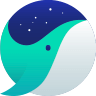
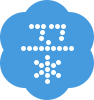

In [ ]:
response.text

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
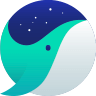
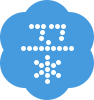

In [ ]:
requests.get('http://naver.com').text

In [ ]:
endpoint = 'https://labuser15computervision.cognitiveservices.azure.com/'
key = 'b49311ba76af4047a14d178174c4536d'

In [ ]:
endpoint = endpoint + 'vision/v2.0/'

In [ ]:
analysisEndpoint = endpoint + 'analyze'

In [ ]:
from PIL import Image
from io import BytesIO

In [ ]:
image_url = 'https://images.mypetlife.co.kr/content/uploads/2021/10/19151330/corgi-g1a1774f95_1280-1024x682.jpg'

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))

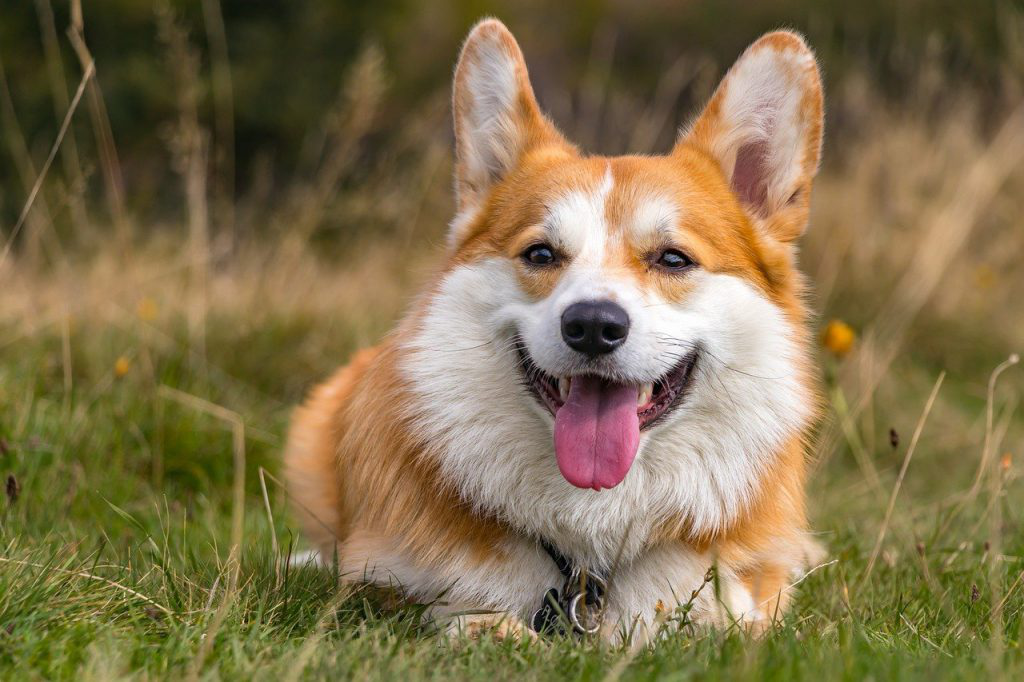

In [ ]:
image

In [ ]:
headers = {'Ocp-Apim-Subscription-Key' : key}
params = {'visualFeatures' : 'Categories,Description,Color'}
data = {'url' : image_url}

In [ ]:
response = requests.post(analysisEndpoint,
                         headers=headers,
                         params=params,
                         json=data)

In [ ]:
result = response.json()
result

{'categories': [{'name': 'animal_dog', 'score': 0.99609375}],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'Brown',
  'dominantColors': [],
  'accentColor': '505C14',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['grass',
   'outdoor',
   'dog',
   'animal',
   'mammal',
   'brown',
   'field',
   'sitting',
   'small',
   'orange',
   'laying',
   'green',
   'lying',
   'large',
   'standing',
   'frisbee',
   'blue',
   'grassy'],
  'captions': [{'text': 'a large brown dog lying on top of a grass covered field',
    'confidence': 0.7797358754956717}]},
 'requestId': '69220193-8929-41c4-91ab-672ef455abfc',
 'metadata': {'height': 682, 'width': 1024, 'format': 'Jpeg'}}

**0131**

image detection

In [ ]:
result['description']

{'tags': ['grass',
  'outdoor',
  'dog',
  'animal',
  'mammal',
  'brown',
  'field',
  'sitting',
  'small',
  'orange',
  'laying',
  'green',
  'lying',
  'large',
  'standing',
  'frisbee',
  'blue',
  'grassy'],
 'captions': [{'text': 'a large brown dog lying on top of a grass covered field',
   'confidence': 0.7797358754956717}]}

In [ ]:
result['description']['captions'] 

[{'text': 'a large brown dog lying on top of a grass covered field',
  'confidence': 0.7797358754956717}]

In [ ]:
result['description']['captions'][0]['text']

'a large brown dog lying on top of a grass covered field'

In [ ]:
detectEndpoint = endpoint + 'detect'

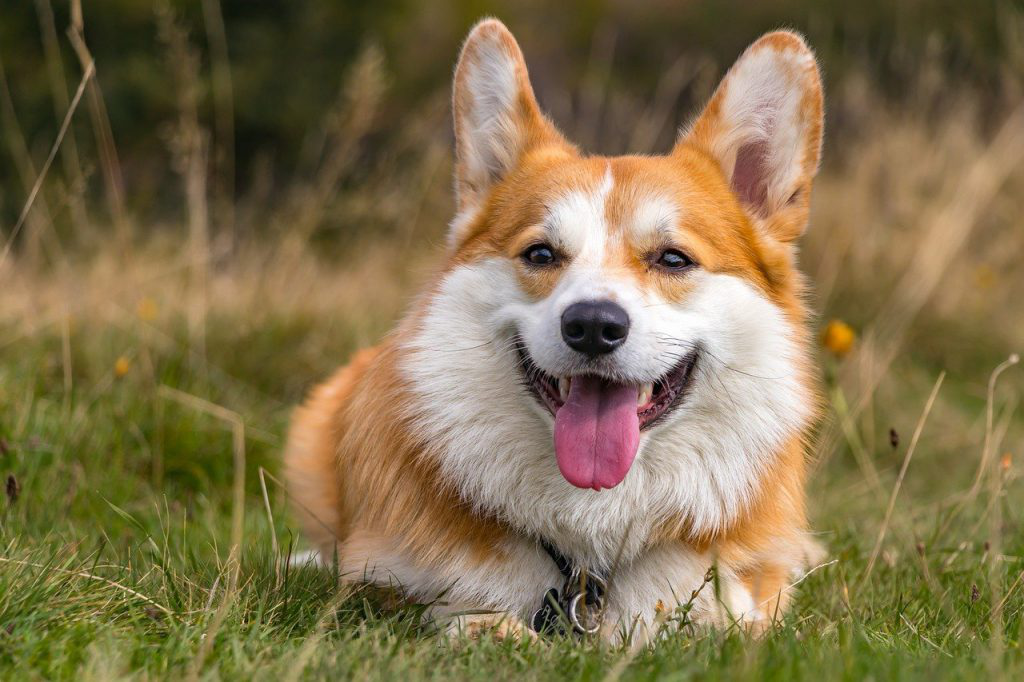

In [ ]:
image

In [ ]:
headers = {'Ocp-Apim-Subscription-key' : key}
params = {}
data = {'url' : image_url}

In [ ]:
response = requests.post(detectEndpoint,
                        headers=headers,
                        params=params,
                        json=data)

In [ ]:
result = response.json()
result

{'objects': [{'rectangle': {'x': 269, 'y': 9, 'w': 579, 'h': 638},
   'object': 'corgi',
   'confidence': 0.929,
   'parent': {'object': 'dog',
    'confidence': 0.944,
    'parent': {'object': 'mammal',
     'confidence': 0.953,
     'parent': {'object': 'animal', 'confidence': 0.954}}}}],
 'requestId': '52fb4867-f5e3-4b46-b060-e173421226db',
 'metadata': {'height': 682, 'width': 1024, 'format': 'Jpeg'}}

In [ ]:
from PIL import Image, ImageDraw, ImageFont

In [ ]:
def MakeRectangle(result):
  objects = result['objects']

  for obj in objects:
    print(objects)

    rect = obj['rectangle']
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x, y), (x+w, y+h)), outline = 'red')

In [ ]:
draw = ImageDraw.Draw(image)
MakeRectangle(result)

[{'rectangle': {'x': 269, 'y': 9, 'w': 579, 'h': 638}, 'object': 'corgi', 'confidence': 0.929, 'parent': {'object': 'dog', 'confidence': 0.944, 'parent': {'object': 'mammal', 'confidence': 0.953, 'parent': {'object': 'animal', 'confidence': 0.954}}}}]


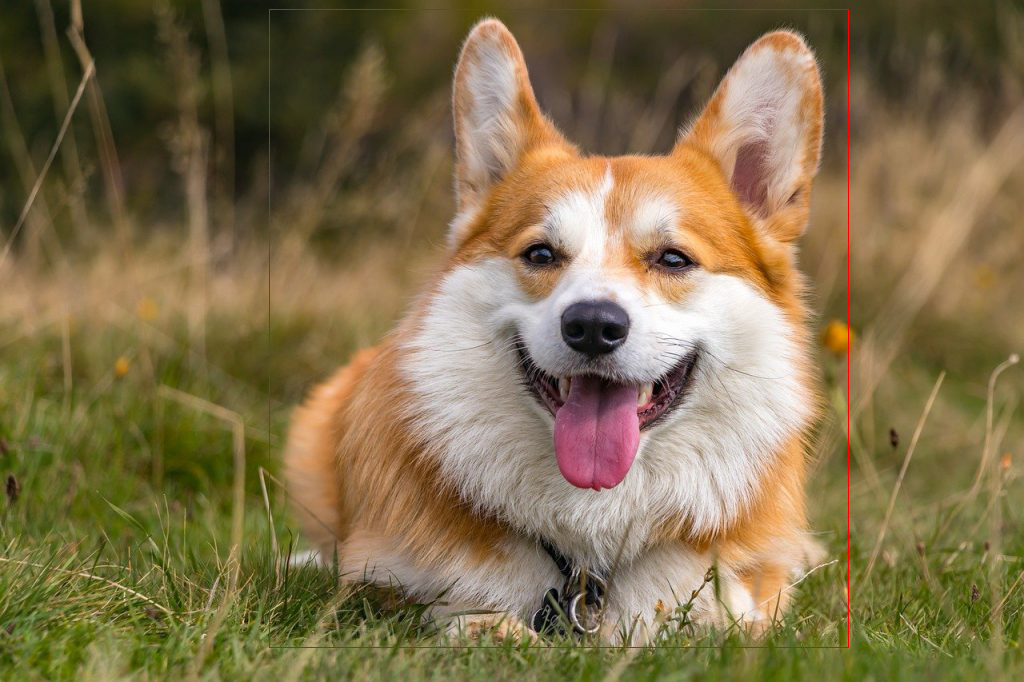

In [ ]:
image